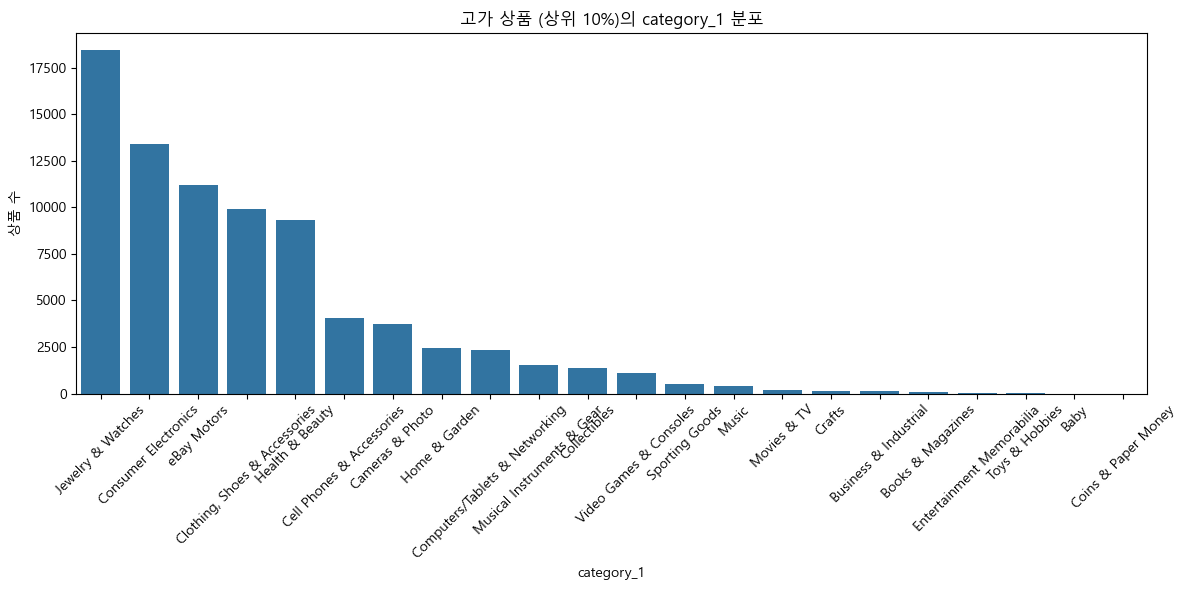

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

df = pd.read_csv('CleanData.csv', encoding='utf-8-sig')

# 🔧 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 고가 기준 (상위 10%)
price_threshold = df['price'].quantile(0.9)

# 고가 상품 필터링
df_high_price = df[df['price'] >= price_threshold]

# 카테고리 분포 집계
top_categories = df_high_price['category_1'].value_counts().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.title('고가 상품 (상위 10%)의 category_1 분포')
plt.xlabel('category_1')
plt.ylabel('상품 수')
plt.tight_layout()
plt.show()


In [2]:
# 상위 5개 카테고리 리스트 추출
top5_categories = top_categories.head(5).index.tolist()
top5_high_price_df = df_high_price[df_high_price['category_1'].isin(top5_categories)]

# 결과 미리보기
top5_high_price_df.to_csv('Top5_Categories.csv', index = False)

c:\Temp\ipykernel_14856\2104501045.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='category_1', y='price', palette='Pastel1', inner='quartile', ax=axes[0])
c:\Temp\ipykernel_14856\2104501045.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='category_1', y='discountRatio', palette='Set2', inner='quartile', ax=axes[2])


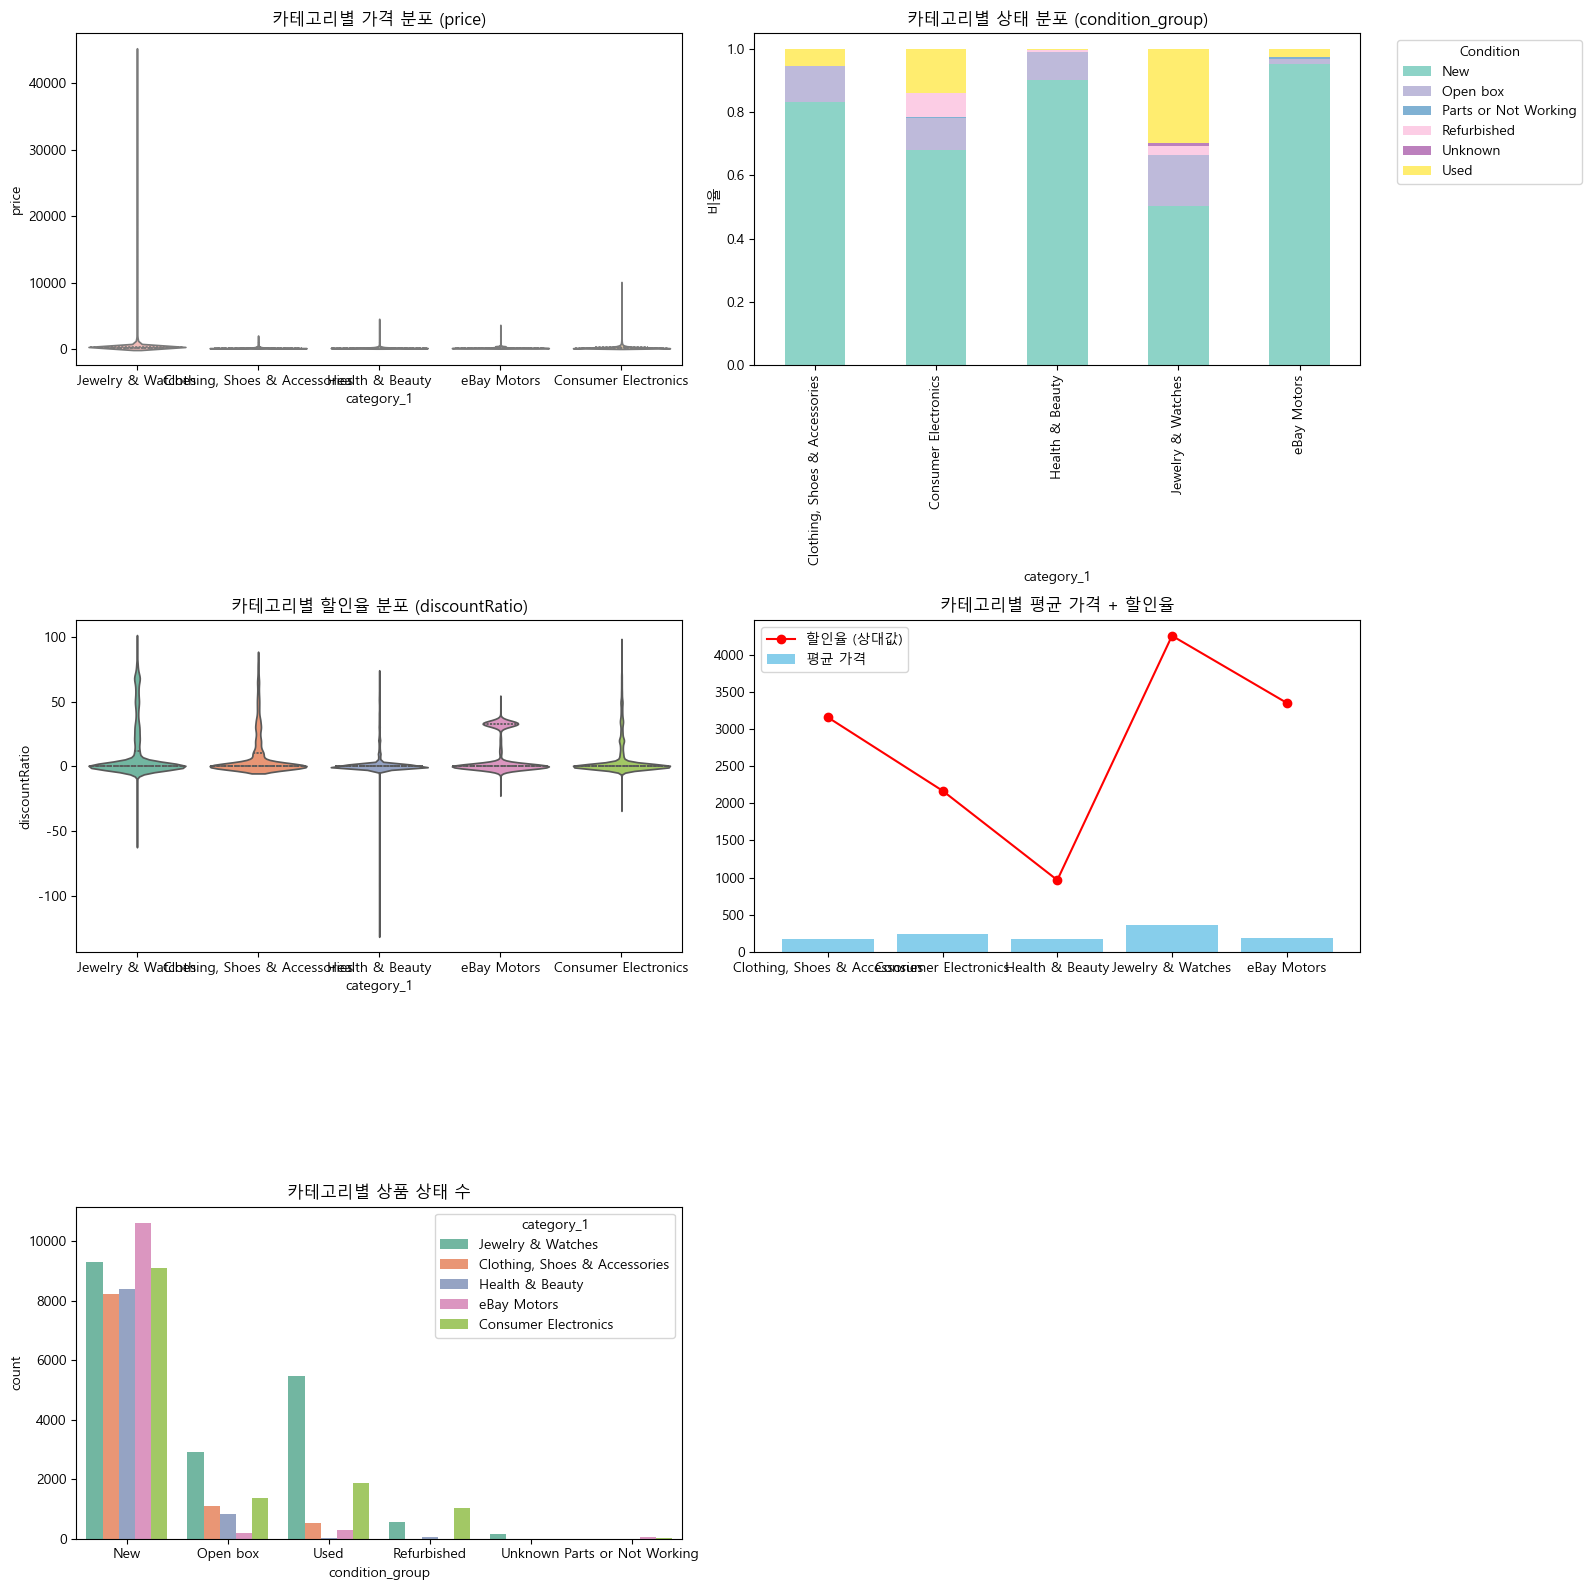

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Top5_Categories.csv', encoding='cp949')

# 🔧 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(3, 2, figsize=(16, 16))
axes = axes.flatten()

# 1. 가격 분포 (Violin Plot)
sns.violinplot(data=df, x='category_1', y='price', palette='Pastel1', inner='quartile', ax=axes[0])
axes[0].set_title('카테고리별 가격 분포 (price)')

# 2. 상태 분포 (100% Stacked Bar)
condition_dist = pd.crosstab(df['category_1'], df['condition_group'], normalize='index')
condition_dist.plot(kind='bar', stacked=True, colormap='Set3', ax=axes[1])
axes[1].set_title('카테고리별 상태 분포 (condition_group)')
axes[1].set_ylabel('비율')
axes[1].legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


# 3. 할인율 분포 (Violin Plot)
sns.violinplot(data=df, x='category_1', y='discountRatio', palette='Set2', inner='quartile', ax=axes[2])
axes[2].set_title('카테고리별 할인율 분포 (discountRatio)')

# 4. 평균 가격 + 할인율 (Barplot)
avg_price = df.groupby('category_1')['price'].mean()
avg_discount = df.groupby('category_1')['discountRatio'].mean()
axes[3].bar(avg_price.index, avg_price.values, color='skyblue', label='평균 가격')
axes[3].plot(avg_discount.index, avg_discount.values * avg_price.max(), color='red', label='할인율 (상대값)', marker='o')
axes[3].set_title('카테고리별 평균 가격 + 할인율')
axes[3].legend()

# 5. 상태별 상품 수 (Countplot)
sns.countplot(data=df, x='condition_group', hue='category_1', ax=axes[4], palette='Set2')
axes[4].set_title('카테고리별 상품 상태 수')

# 6. 빈 공간
axes[5].axis('off')

plt.tight_layout()
plt.show()


c:\Temp\ipykernel_14856\2782275484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='category_1', y='price', palette='Set2')


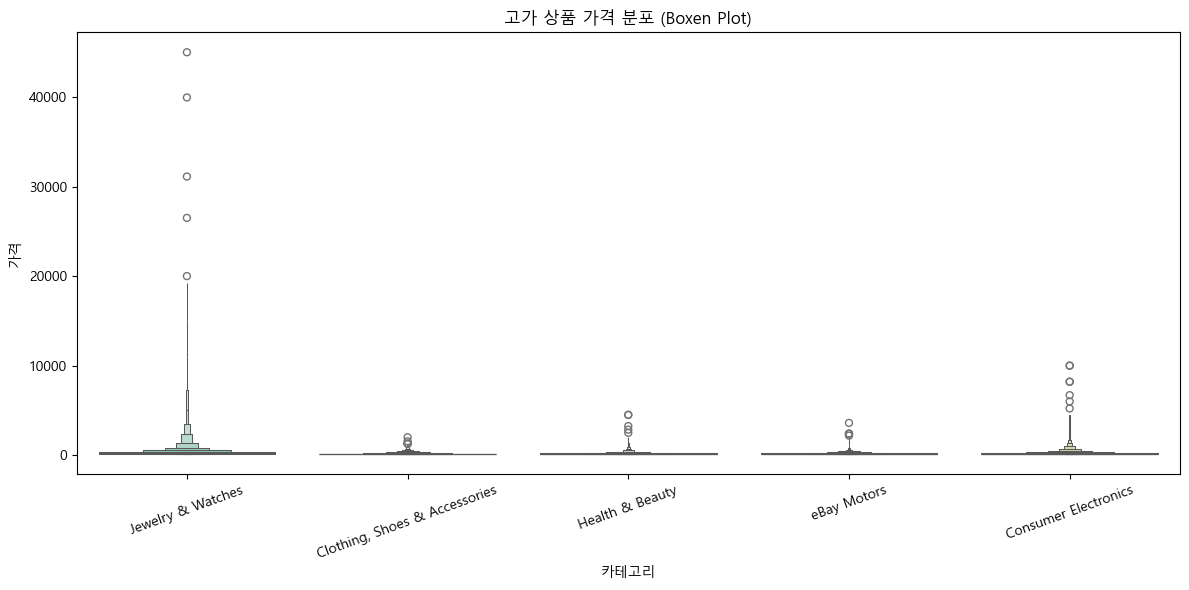

In [7]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, x='category_1', y='price', palette='Set2')
plt.title("고가 상품 가격 분포 (Boxen Plot)")
plt.xlabel("카테고리")
plt.ylabel("가격")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [8]:
df_top5 = df
top5 = top5_categories

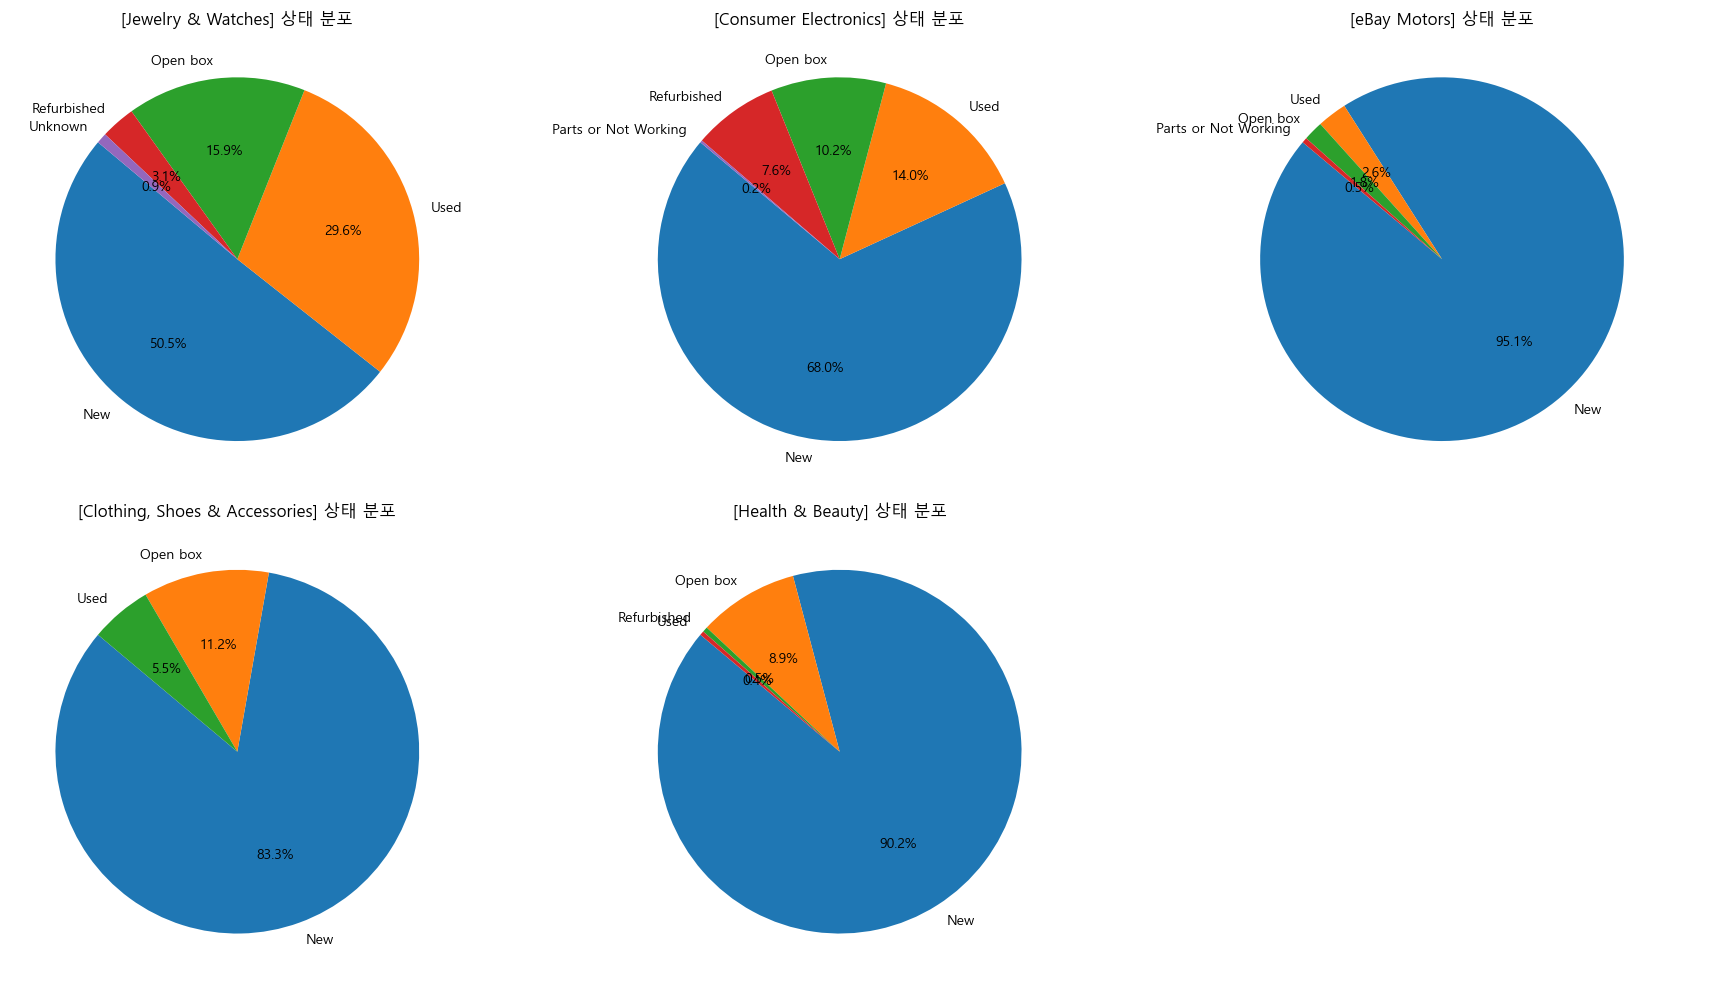

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, category in enumerate(top5):
    cat_data = df_top5[df_top5['category_1'] == category]
    condition_counts = cat_data['condition_group'].value_counts()
    axes[i].pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f"[{category}] 상태 분포")

axes[5].axis('off')  # 빈 칸 비우기
plt.tight_layout()
plt.show()


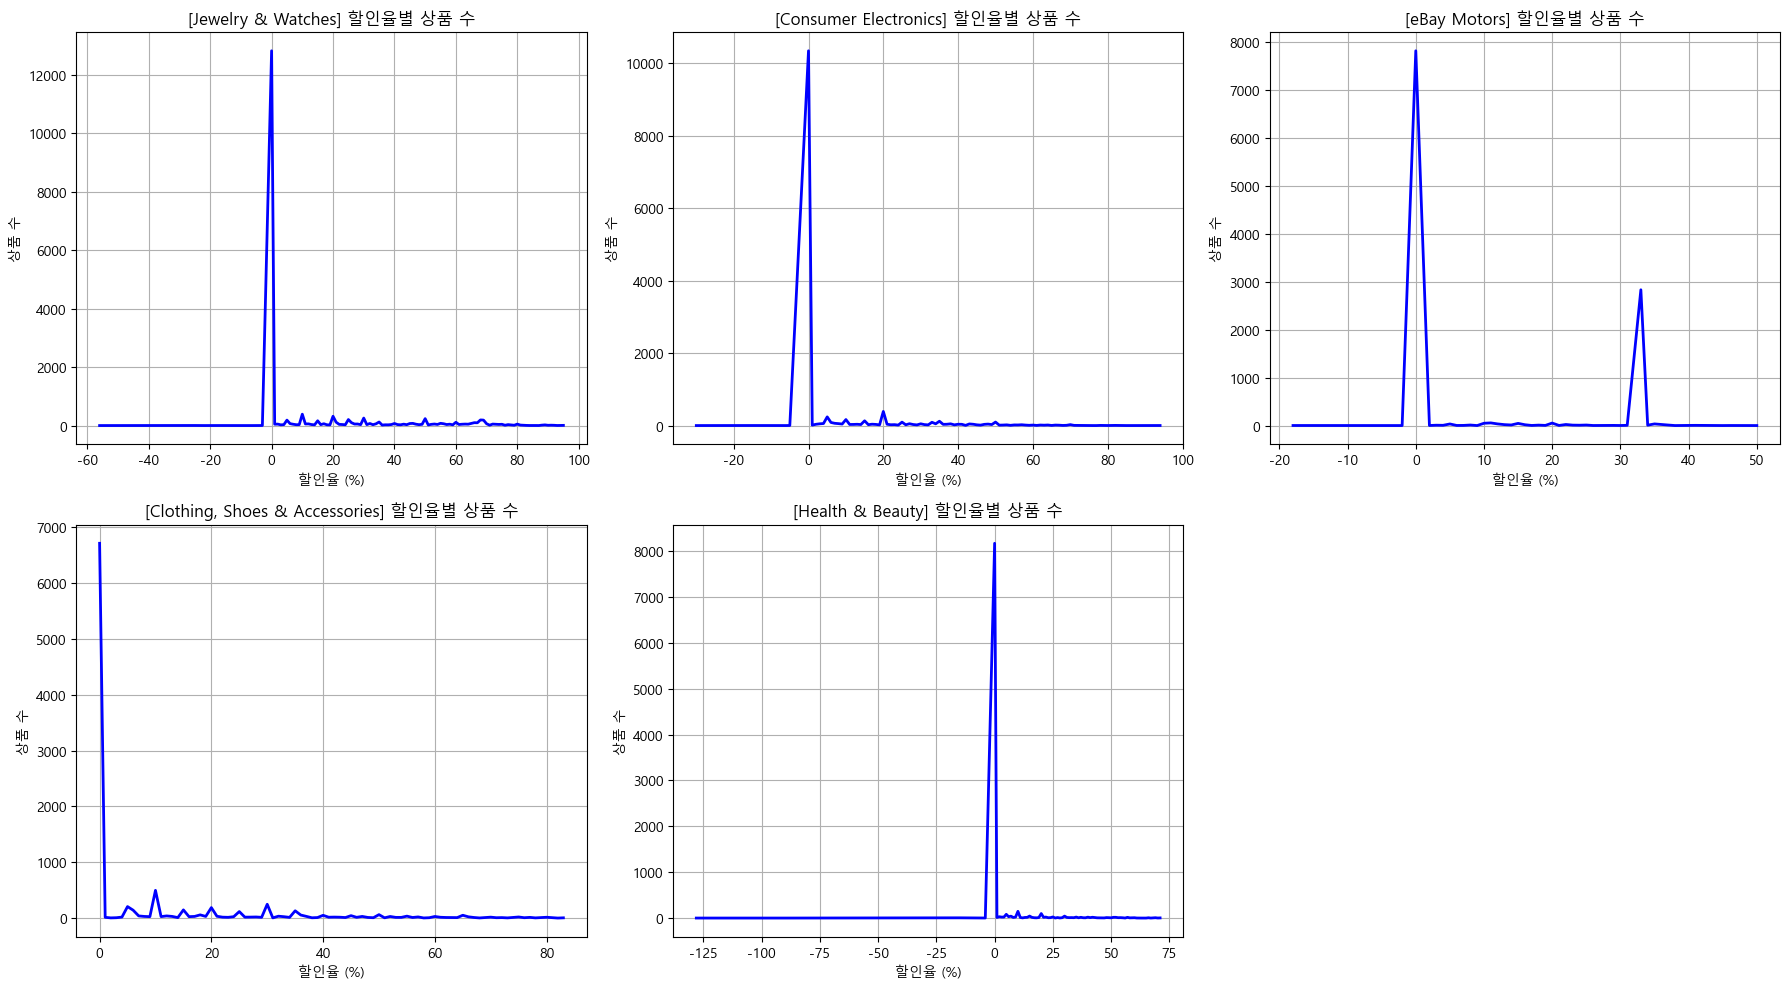

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, category in enumerate(top5):
    cat_data = df_top5[df_top5['category_1'] == category]
    
    # 할인율 값별 빈도 계산
    discount_counts = cat_data['discountRatio'].value_counts().sort_index()

    # 선 그래프로 표현
    axes[i].plot(discount_counts.index, discount_counts.values, color='blue', linewidth=2)
    axes[i].set_title(f"[{category}] 할인율별 상품 수")
    axes[i].set_xlabel("할인율 (%)")
    axes[i].set_ylabel("상품 수")
    axes[i].grid(True)

# 빈 서브플롯 비우기
axes[5].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 1. 데이터 불러오기
df = pd.read_csv('CleanData.csv', encoding='utf-8')

# 2. 고가 상품 기준 설정 (상위 10%)
price_threshold = df['price'].quantile(0.90)
df_high_price = df[df['price'] >= price_threshold]

# 3. 고가 상품 내 category_1별 상품 수 집계
top_categories = df_high_price['category_1'].value_counts().nlargest(5)

# 4. 상위 5개 카테고리명 리스트로 저장
top5 = top_categories.index.tolist()

# 5. 상위 5개 카테고리에 해당하는 고가 상품만 추출
df_top5 = df_high_price[df_high_price['category_1'].isin(top5)].copy()

# 6. CSV 파일로 저장
df_top5.to_csv('Top5_Categories.csv', index=False, encoding='utf-8-sig')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801367 entries, 0 to 801366
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   availableCoupons          801367 non-null  bool   
 1   bidCount                  1148 non-null    float64
 2   buyingOptions             801367 non-null  object 
 3   categories                801367 non-null  object 
 4   condition                 801367 non-null  object 
 5   currentBidPrice           1148 non-null    object 
 6   itemCreationDate          801367 non-null  object 
 7   itemEndDate               1148 non-null    object 
 8   itemId                    801367 non-null  object 
 9   itemLocation              801367 non-null  object 
 10  itemOriginDate            801367 non-null  object 
 11  leafCategoryIds           801367 non-null  object 
 12  listingMarketplaceId      801367 non-null  object 
 13  price                     801367 non-null  f

In [4]:
df['condition_Group'].value_counts()

condition_Group
New                     583020
Open box                106569
Used                    101555
Refurbished               6203
Unknown                   3513
Parts or Not Working       507
Name: count, dtype: int64

In [6]:
df['topRatedBuyingExperience'].value_counts()

topRatedBuyingExperience
False    593973
True     207394
Name: count, dtype: int64